# DBSCAN for outlier detection

Unsupervised method that clusters core samples (dense areas of a dataset) and denotes non-core samples (sparse portions of the dataset)

- Use to identify collective outliers
- Outliers should make up <= 5% of the total observations. Adjust model parameters accordingly.

Important DBSCAN parameters:

- **eps** (is the maximum distance between two samples for them to be clustered in the same neighborhood.)
- **min_samples** (are the minimum number of samples in a neighborhood for a data point to qualify as a core point)


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from pylab import rcParams
import seaborn as sb 

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

## DBSCAN clustering to identify outliers

### Load data

In [3]:
df = pd.read_csv('../../inputs/iris.data.csv')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Train your model and identify outliers

In [4]:
data = df.iloc[:,0:4].values
target = df.iloc[:,4].values

In [5]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
# eps equal to 0.8. That tells Python that we want a maximum distance of 0.8 between two samples in order for them to still be considered as in the same neighborhood.
# min_samples, we want to set that to 19. What this does is it tells Python that each point must have a minimum of 19 samples to be considered as a core point.
print(model)

DBSCAN(eps=0.8, min_samples=19)


### Visualize your results

In [7]:
outliers_df = pd.DataFrame(data)

print(Counter(model.labels_))
print(outliers_df[model.labels_ == -1])

# 150 total observations
# 6 with label -1 (4%)

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

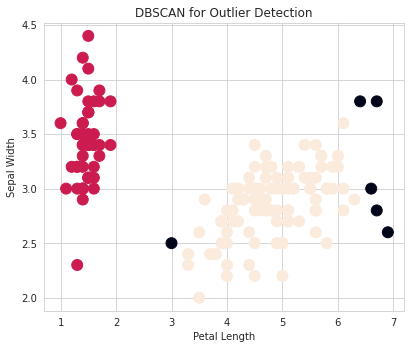

In [8]:
fig = plt.figure()

ax = fig.add_axes([.1, .1, 1, 1])
colors = model.labels_

ax.scatter(data[:,2], data[:,1], c=colors, s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for Outlier Detection')

